<a href="https://colab.research.google.com/github/mae25-create/data_visualization-analysis_practice/blob/main/Expedia_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying SARIMA to the Expedia Dataset

In [ ]:
!pip uninstall numpy -y

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5


In [ ]:
!pip install numpy==1.23.5 # We need this version of numpy. Very important!!
!pip install pmdarima --no-cache-dir

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
^C


In [ ]:
import numpy as np
print(np.__version__) # It has to say 1.23.5.

2.0.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('expedia_clean.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,user_id,is_mobile,...,hotel_country,hotel_market,hotel_cluster,year,month,day_of_week,time,hour,stay_length,search_lead_time
0,0,24636210,2014-11-03,24,2,Australia,871,36643,792280,0,...,Australia,1258,68,2014,11,Monday,16:02:28,16,4,42
1,2,13066459,2014-10-13,2,3,United States,314,48562,495669,0,...,Germany,29,22,2014,10,Monday,13:20:25,13,7,172
2,3,4691082,2013-11-05,11,3,Canada,411,52752,106611,0,...,Canada,1234,42,2013,11,Tuesday,10:40:34,10,1,2
3,4,4878884,2014-06-10,2,3,United States,174,50644,596177,0,...,United States,368,83,2014,6,Tuesday,13:34:56,13,5,54
4,6,24023139,2014-01-28,2,3,United States,337,54287,908558,0,...,Canada,400,6,2014,1,Tuesday,13:16:36,13,2,30


In [ ]:
df = df.drop(df.columns[[0, 1]], axis=1)
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,...,hotel_country,hotel_market,hotel_cluster,year,month,day_of_week,time,hour,stay_length,search_lead_time
0,2014-11-03,24,2,Australia,871,36643,792280,0,1,1,...,Australia,1258,68,2014,11,Monday,16:02:28,16,4,42
1,2014-10-13,2,3,United States,314,48562,495669,0,1,9,...,Germany,29,22,2014,10,Monday,13:20:25,13,7,172
2,2013-11-05,11,3,Canada,411,52752,106611,0,0,0,...,Canada,1234,42,2013,11,Tuesday,10:40:34,10,1,2
3,2014-06-10,2,3,United States,174,50644,596177,0,0,9,...,United States,368,83,2014,6,Tuesday,13:34:56,13,5,54
4,2014-01-28,2,3,United States,337,54287,908558,0,0,2,...,Canada,400,6,2014,1,Tuesday,13:16:36,13,2,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96534 entries, 0 to 96533
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_time                 96534 non-null  object
 1   site_name                 96534 non-null  int64 
 2   posa_continent            96534 non-null  int64 
 3   user_location_country     96534 non-null  object
 4   user_location_region      96534 non-null  int64 
 5   user_location_city        96534 non-null  int64 
 6   user_id                   96534 non-null  int64 
 7   is_mobile                 96534 non-null  int64 
 8   is_package                96534 non-null  int64 
 9   channel                   96534 non-null  int64 
 10  srch_ci                   96534 non-null  object
 11  srch_co                   96534 non-null  object
 12  srch_adults_cnt           96534 non-null  int64 
 13  srch_children_cnt         96534 non-null  int64 
 14  srch_rm_cnt           

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df_time = df.resample("D", on="date_time").size()

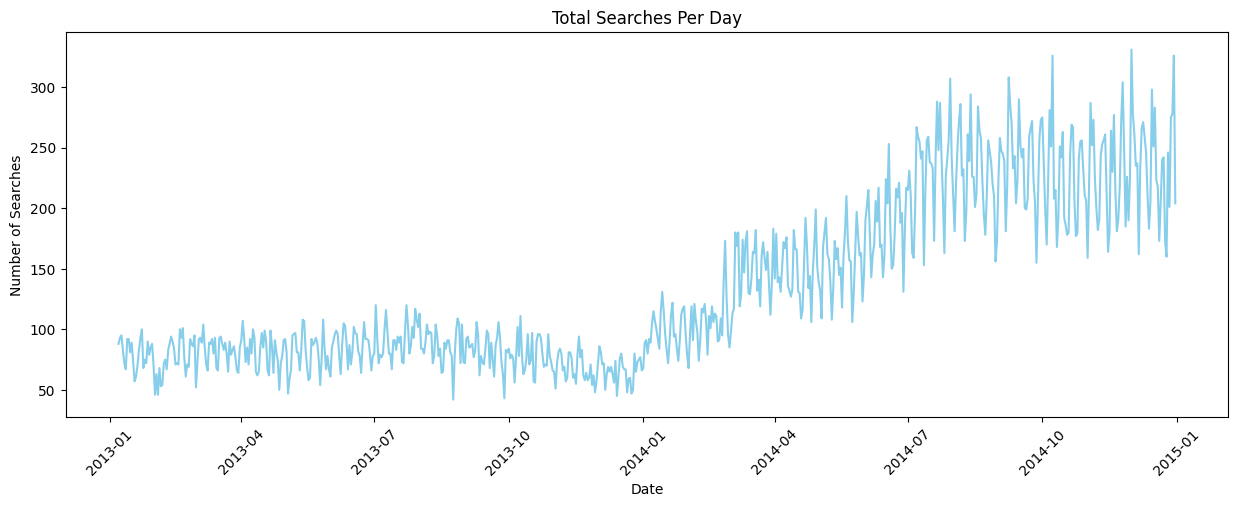

In [ ]:
fig = plt.figure(figsize=(15, 5))

# Plot total searches
plt.plot(df_time.index, df_time.values, linestyle="-", color="skyblue")
plt.title("Total Searches Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Searches")
plt.tick_params(axis="x", rotation=45)

plt.show()

We'll deal with this time series. Number of searches as a function of the time, with one value per day.

We will come up with multiple "good" models, potential candidates to be used. This is why we need a validation set. We'll withold the last month of data as a validation set. We'll decide which are the best models using the training set and we'll validate them with new, unseen data (the validation set). Then, we'll use it to make a decision on which one is the best. Then, we'll retrain using all the data and we'll use it to predict!

In [ ]:
train = df_time[:-31]
val = df_time[-31:]

The first step is to check stationarity. We use the Augmented Dickey-Fuller Test to check it. The null hypothesis is that the time series is not stationary, and the alternative hypothesis is that the time series is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: 0.4152194250410079
p-value: 0.9820552570693531
Critical Values: {'1%': np.float64(-3.440118534323335), '5%': np.float64(-2.865850549495406), '10%': np.float64(-2.569065506040958)}


The the $p$-value is very close to 1, way bigger than 0.05. This means that there is no evidence against the null hypothesis (the time series not being stationary), so we can't reject it. The time series seems not stationary. So, we take differences to make it stationary.

In [ ]:
df_diff1 = train.diff().dropna()

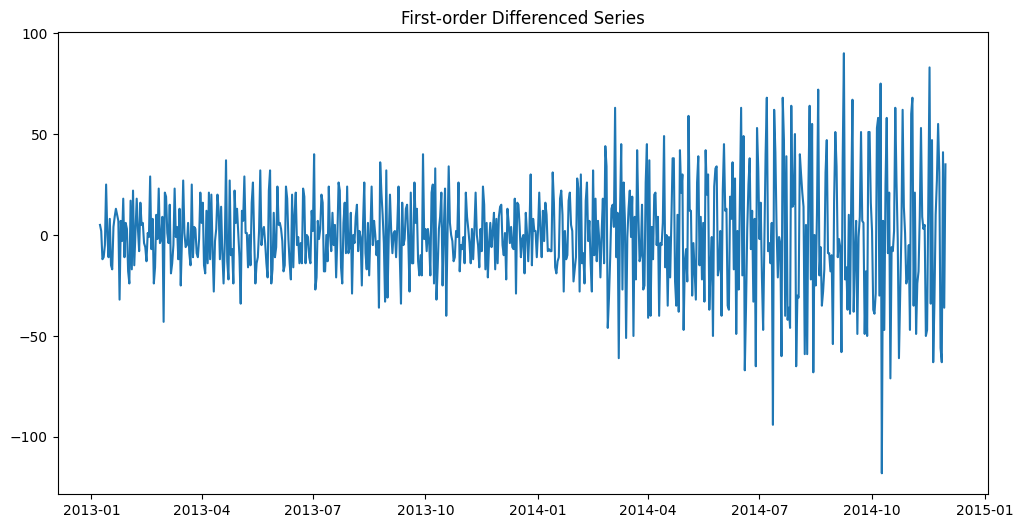

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_diff1)
plt.title("First-order Differenced Series")
plt.show()

Let's test stationarity again! We'll use the Augmented Dickey-Fuller Test.

In [ ]:
result1 = adfuller(df_diff1)
print("ADF Statistic:", result1[0])
print("p-value:", result1[1])
print("Critical Values:", result1[4])

ADF Statistic: -8.047535280775575
p-value: 1.7778865253000869e-12
Critical Values: {'1%': -3.440118534323335, '5%': -2.865850549495406, '10%': -2.569065506040958}


Oh! Now, the $p$-value is very, very close to zero. So, we have evidence to reject the null hypothesis. We can say that the first-order differencing leads to a stationary time series.

We are going to start without the seasonal component, first. We already know that, if we want to fit the time series to an ARIMA$(p,d,q)$ model, $d=1$. Now, we need to determine $p$ and $q$. As we saw before, we need the ACF and pACF. Let's plot them!

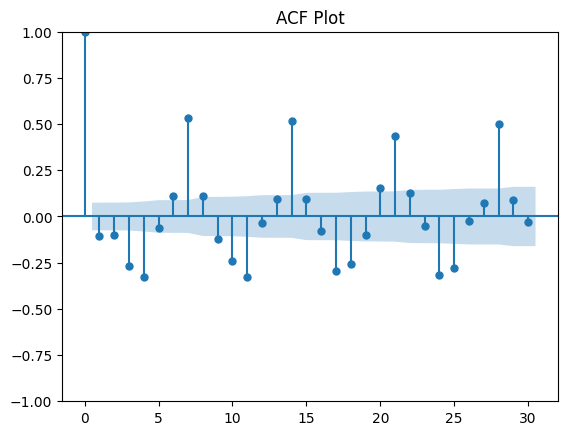

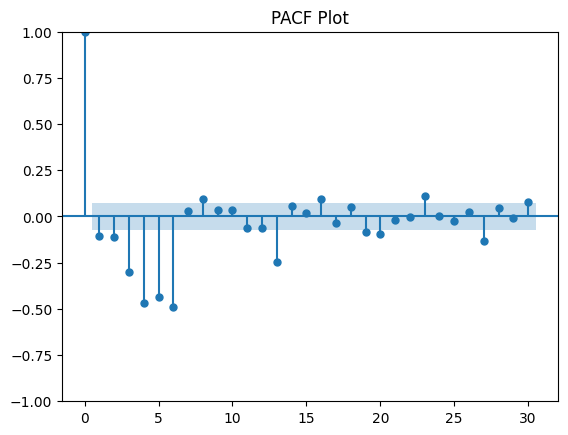

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_diff1, lags=30)
plt.title("ACF Plot")
plt.show()

plot_pacf(df_diff1, lags=30, method='ywm')
plt.title("PACF Plot")
plt.show()

Look at the ACF. The correlation seems to have a pattern. Every seven days. This suggests that we have seasonality! So, we will want to fit a SARIMA$(p,d,q)(P,D,Q)_7$ model.

In [ ]:
# WARNING: This chunk takes around 3 minutes to run. Be patient!

from pmdarima import auto_arima

# Run auto_arima with seasonal=True and m=7 (weekly seasonality)
model_auto = auto_arima(
    train,
    seasonal=True,
    m=7,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Summary of the best model
print(model_auto.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=5778.181, Time=4.05 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=6474.007, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=6120.181, Time=0.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=6181.316, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=6472.047, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=inf, Time=5.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=5948.412, Time=2.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=5773.572, Time=5.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=5864.725, Time=6.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=5772.086, Time=6.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=5783.752, Time=8.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,2)[7] intercept   : AIC=5768.861, Time=5.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,2)[7] intercept   : AIC=5768.619, Time=7.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[7] intercept   : AIC=6001.630, Time=2.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=5767.884, Time=2.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=6110.607, Time=1.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=5946.982, Time=3.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,1)[7] intercept   : AIC=5768.030, Time=4.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=6267.776, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,0)[7] intercept   : AIC=5863.133, Time=2.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=5765.906, Time=2.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[7] intercept   : AIC=6113.769, Time=0.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=5950.942, Time=2.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,1)[7] intercept   : AIC=5766.475, Time=4.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[7] intercept   : AIC=5766.527, Time=4.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=6273.709, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,2)[7] intercept   : AIC=6003.297, Time=3.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,0)[7] intercept   : AIC=5872.830, Time=2.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,2)[7] intercept   : AIC=inf, Time=5.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=5769.992, Time=2.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,1)[7] intercept   : AIC=5767.906, Time=5.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=5765.931, Time=2.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,1)[7] intercept   : AIC=5769.251, Time=3.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[7]             : AIC=5763.910, Time=0.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[7]             : AIC=6116.044, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[7]             : AIC=5951.791, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,1)[7]             : AIC=5764.480, Time=4.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[7]             : AIC=5764.533, Time=2.20 sec
 ARIMA(0,1,2)(0,0,0)[7]             : AIC=6276.339, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,2)[7]             : AIC=6005.197, Time=0.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,0)[7]             : AIC=5871.891, Time=0.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,2)[7]             : AIC=inf, Time=3.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[7]             : AIC=5767.995, Time=0.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[7]             : AIC=5765.886, Time=3.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,1)[7]             : AIC=5765.910, Time=1.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[7]             : AIC=5763.893, Time=1.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[7]             : AIC=6114.809, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[7]             : AIC=5947.472, Time=0.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,1)[7]             : AIC=5764.278, Time=2.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,2)[7]             : AIC=5764.343, Time=2.45 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=6288.008, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,2)[7]             : AIC=6002.925, Time=0.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[7]             : AIC=5867.384, Time=1.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,2)[7]             : AIC=inf, Time=6.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[7]             : AIC=5918.718, Time=0.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[7]             : AIC=5765.892, Time=1.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[7]             : AIC=6057.893, Time=0.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[7]             : AIC=5845.366, Time=0.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,1)[7]             : AIC=inf, Time=2.77 sec

Best model:  ARIMA(1,1,1)(1,0,1)[7]          
Total fit time: 153.940 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  693
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -2876.947
Date:                           Thu, 29 May 2025   AIC                           5763.893
Time:                                   15:14:47   BIC                           5786.591
Sample:                               01-07-2013   HQIC                          5772.672
                                    - 11-30-2014                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

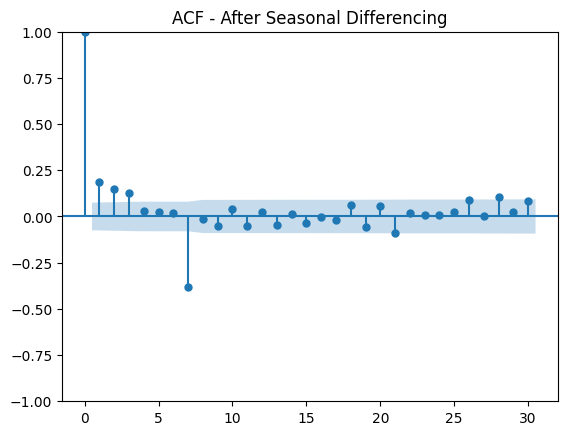

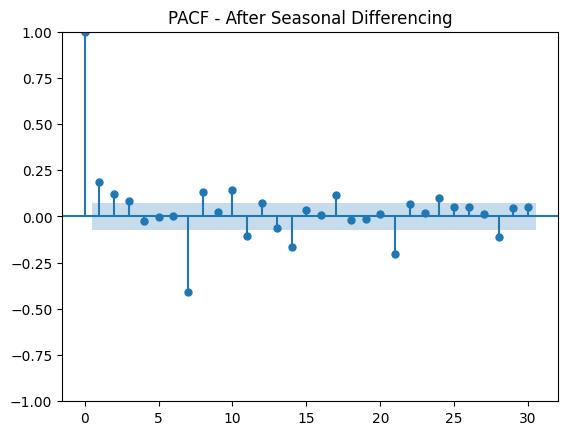

In [ ]:
df_diff_seas = train.diff(7).dropna()

plot_acf(df_diff_seas, lags=30)
plt.title("ACF - After Seasonal Differencing")
plt.show()

plot_pacf(df_diff_seas, lags=30, method='ywm')
plt.title("PACF - After Seasonal Differencing")
plt.show()

In [ ]:
# WARNING: This chunk takes around 5 minutes to run. Be patient!

# Run auto_arima with seasonal=True and m=7 (weekly seasonality)
# Let's force D=1, to see if it comes up with something better
model_auto = auto_arima(
    train,
    seasonal=True,
    m=7, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Summary of the best model
print(model_auto.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=5706.279, Time=6.05 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=6014.304, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=5859.917, Time=0.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=5825.526, Time=0.67 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=6016.681, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=5704.956, Time=3.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,1,0)[7] intercept   : AIC=5927.698, Time=4.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,1,2)[7] intercept   : AIC=5706.305, Time=6.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,1,0)[7] intercept   : AIC=5841.094, Time=2.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,1,2)[7] intercept   : AIC=inf, Time=9.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=5704.035, Time=2.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,1,0)[7] intercept   : AIC=5983.155, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,1)[7] intercept   : AIC=5704.869, Time=2.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,1,2)[7] intercept   : AIC=5704.909, Time=6.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,0)[7] intercept   : AIC=5840.809, Time=1.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,2)[7] intercept   : AIC=inf, Time=6.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=5809.753, Time=3.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=5705.575, Time=1.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,1,1)[7] intercept   : AIC=5705.925, Time=3.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,1,1)[7] intercept   : AIC=5782.963, Time=1.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=5704.134, Time=1.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,1,1)[7] intercept   : AIC=5703.814, Time=6.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,1,0)[7] intercept   : AIC=5913.607, Time=3.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(1,1,1)[7] intercept   : AIC=5702.855, Time=7.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(1,1,0)[7] intercept   : AIC=5840.416, Time=3.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(2,1,1)[7] intercept   : AIC=5704.755, Time=11.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(1,1,2)[7] intercept   : AIC=5706.155, Time=16.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,1,2)[7] intercept   : AIC=5702.827, Time=9.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,1,2)[7] intercept   : AIC=5706.901, Time=6.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,1,2)[7] intercept   : AIC=5702.258, Time=11.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,1,1)[7] intercept   : AIC=5701.261, Time=5.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,1,0)[7] intercept   : AIC=inf, Time=5.80 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(1,1,1)[7] intercept   : AIC=5702.174, Time=6.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(1,1,0)[7] intercept   : AIC=5790.189, Time=6.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(1,1,2)[7] intercept   : AIC=5703.957, Time=11.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,1,1)[7] intercept   : AIC=5704.307, Time=6.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,1,1)[7] intercept   : AIC=5702.197, Time=6.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,4)(0,1,1)[7] intercept   : AIC=5702.567, Time=9.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,4)(0,1,1)[7] intercept   : AIC=5704.579, Time=8.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,1,1)[7] intercept   : AIC=5705.722, Time=4.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,1,1)[7] intercept   : AIC=5711.518, Time=9.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,1,1)[7]             : AIC=5696.771, Time=4.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,1,0)[7]             : AIC=inf, Time=2.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(1,1,1)[7]             : AIC=5702.292, Time=6.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,1,2)[7]             : AIC=5702.738, Time=7.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(1,1,0)[7]             : AIC=5791.026, Time=5.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(1,1,2)[7]             : AIC=5706.117, Time=10.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,1,1)[7]             : AIC=5703.443, Time=4.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,1,1)[7]             : AIC=5703.932, Time=2.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,1,1)[7]             : AIC=5702.431, Time=6.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,4)(0,1,1)[7]             : AIC=5704.286, Time=6.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,1,1)[7]             : AIC=5704.726, Time=2.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,4)(0,1,1)[7]             : AIC=5706.748, Time=6.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,1,1)[7]             : AIC=5705.453, Time=4.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,1,1)[7]             : AIC=5711.834, Time=8.92 sec

Best model:  ARIMA(3,0,3)(0,1,1)[7]          
Total fit time: 302.469 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  693
Model:             SARIMAX(3, 0, 3)x(0, 1, [1], 7)   Log Likelihood               -2840.386
Date:                             Thu, 29 May 2025   AIC                           5696.771
Time:                                     15:19:50   BIC                           5733.018
Sample:                                 01-07-2013   HQIC                          5710.796
                                      - 11-30-2014                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

So far, we have seen the following candidates:

*   SARIMA$(1,1,1)(1,0,1)_7$
*   SARIMA$(0,1,2)(1,0,1)_7$
*   SARIMA$(1,1,2)(1,0,1)_7$
*   SARIMA$(2,1,2)(1,0,1)_7$
*   SARIMA$(3,0,3)(0,1,1)_7$
*   SARIMA$(3,0,3)(2,1,1)_7$

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Models
model1 = SARIMAX(train, order=(1,1,1), seasonal_order=(1,0,1,7)).fit()
model2 = SARIMAX(train, order=(0,1,2), seasonal_order=(1,0,1,7)).fit()
model3 = SARIMAX(train, order=(1,1,2), seasonal_order=(1,0,1,7)).fit()
model4 = SARIMAX(train, order=(2,1,2), seasonal_order=(1,0,1,7)).fit()
model5 = SARIMAX(train, order=(3,0,3), seasonal_order=(0,1,1,7)).fit()
model6 = SARIMAX(train, order=(3,0,3), seasonal_order=(2,1,1,7)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/sta

In [ ]:
forecast1 = model1.forecast(steps=31)
forecast2 = model2.forecast(steps=31)
forecast3 = model3.forecast(steps=31)
forecast4 = model4.forecast(steps=31)
forecast5 = model5.forecast(steps=31)
forecast6 = model6.forecast(steps=31)

from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate(y_true, y_pred, name):
    print(f"{name} MAE:", mean_absolute_error(y_true, y_pred))
    print(f"{name} RMSE:", mean_squared_error(y_true, y_pred) ** 0.5)

evaluate(val, forecast1, "SARIMA(1,1,1)(1,0,1)[7] - Model 1")
evaluate(val, forecast2, "SARIMA(0,1,2)(1,0,1)[7] - Model 2")
evaluate(val, forecast3, "SARIMA(1,1,2)(1,0,1)[7] - Model 3")
evaluate(val, forecast4, "SARIMA(2,1,2)(1,0,1)[7] - Model 4")
evaluate(val, forecast5, "SARIMA(3,0,3)(0,1,1)[7] - Model 5")
evaluate(val, forecast6, "SARIMA(3,0,3)(2,1,1)[7] - Model 6")

SARIMA(1,1,1)(1,0,1)[7] - Model 1 MAE: 24.470057645909815
SARIMA(1,1,1)(1,0,1)[7] - Model 1 RMSE: 34.04615552409561
SARIMA(0,1,2)(1,0,1)[7] - Model 2 MAE: 24.484675090765787
SARIMA(0,1,2)(1,0,1)[7] - Model 2 RMSE: 34.070395808669254
SARIMA(1,1,2)(1,0,1)[7] - Model 3 MAE: 24.461069844982273
SARIMA(1,1,2)(1,0,1)[7] - Model 3 RMSE: 34.03115704764781
SARIMA(2,1,2)(1,0,1)[7] - Model 4 MAE: 24.585059526552246
SARIMA(2,1,2)(1,0,1)[7] - Model 4 RMSE: 34.37476315632432
SARIMA(3,0,3)(0,1,1)[7] - Model 5 MAE: 24.154195524769154
SARIMA(3,0,3)(0,1,1)[7] - Model 5 RMSE: 34.02400838341921
SARIMA(3,0,3)(2,1,1)[7] - Model 6 MAE: 24.636218884101606
SARIMA(3,0,3)(2,1,1)[7] - Model 6 RMSE: 34.197314738458374


So, the best model seems to be AutoARIMA Model 5, i.e., SARIMA$(3,0,3)(0,1,1)_7$. Because both MAE and RMSE are the lowest. We can retrain with the whole dataset, and use it to forecast.

In [ ]:
# Fit model on full data
final_model = SARIMAX(df_time, order=(3,0,3), seasonal_order=(0,1,1,7)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Do the residuals follow any pattern? Or do they kind of "random"?

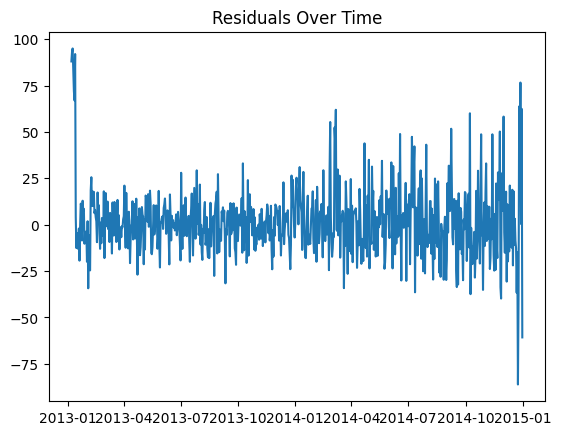

In [ ]:
plt.plot(final_model.resid)
plt.title("Residuals Over Time")
plt.show()

Let's forecast!

In [ ]:
# Number of days to forecast
n_periods = 31

# Forecast starting from next day to 31 days ahead
forecast = final_model.get_forecast(steps=n_periods)

# Get predicted mean and confidence intervals
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

In [ ]:
last_date = pd.to_datetime("2014-12-31")
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods, freq='D')

# Put forecast in a DataFrame for convenience
forecast_df = pd.DataFrame({
    'forecast': forecast_mean,
    'lower_conf_int': conf_int.iloc[:, 0],
    'upper_conf_int': conf_int.iloc[:, 1]
}, index=forecast_dates)

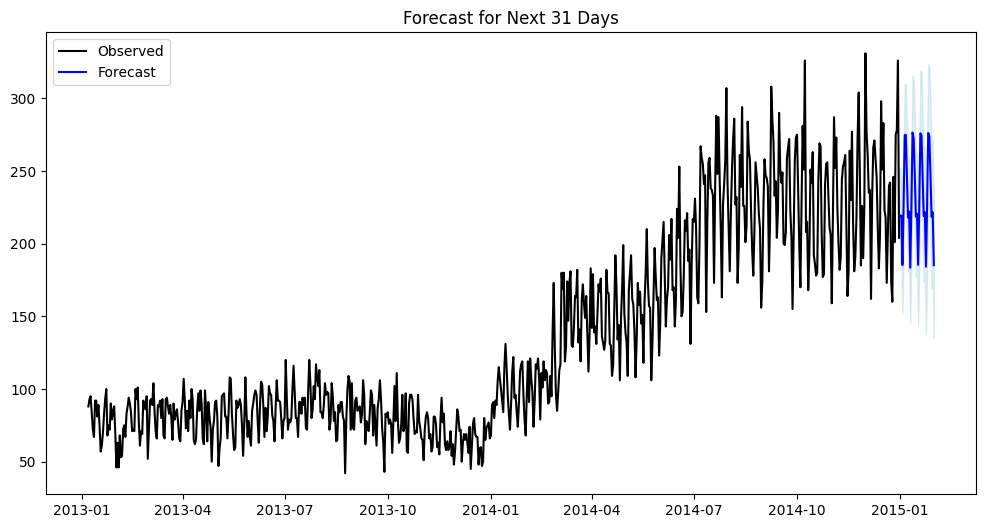

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_time, label='Observed', color='black')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color="blue")
plt.fill_between(forecast_df.index,
                 forecast_df['lower_conf_int'],
                 forecast_df['upper_conf_int'],
                 color='lightblue', alpha=0.4)
plt.title('Forecast for Next 31 Days')
plt.legend()
plt.show()

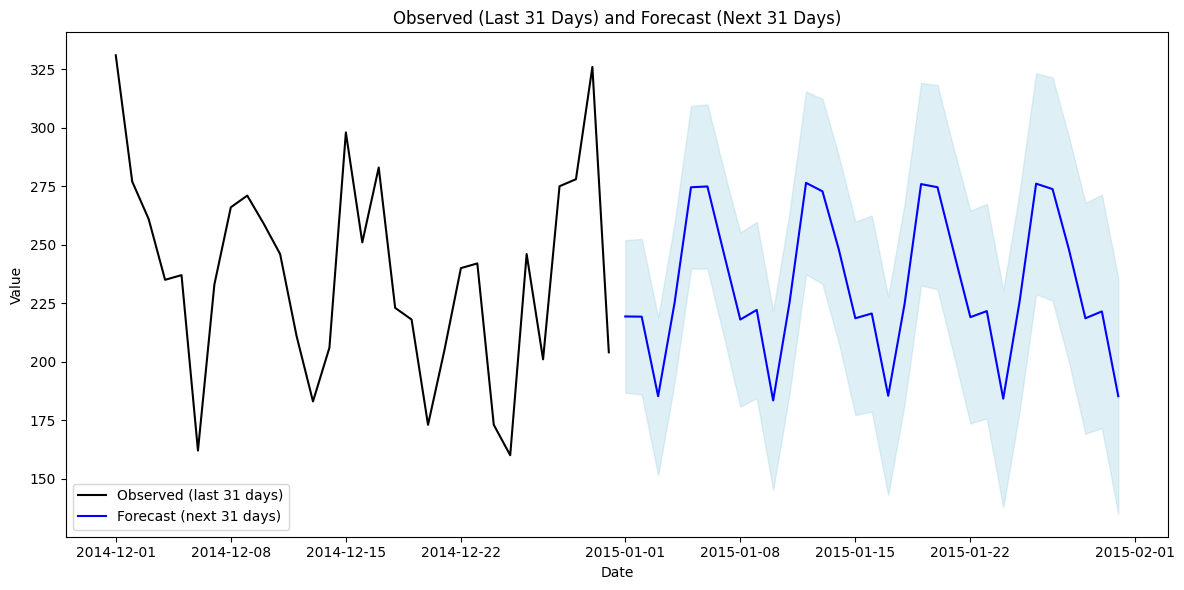

In [ ]:
# Get the last 31 days of actual data
last_31_days = df_time[-31:]

# Combine with forecast
plt.figure(figsize=(12,6))

# Plot last 31 days of observed data in black
plt.plot(last_31_days.index, last_31_days.values, label='Observed (last 31 days)', color='black')

# Plot forecast in blue
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast (next 31 days)', color='blue')

# Confidence interval in light blue
plt.fill_between(forecast_df.index,
                 forecast_df['lower_conf_int'],
                 forecast_df['upper_conf_int'],
                 color='lightblue', alpha=0.4)

plt.title('Observed (Last 31 Days) and Forecast (Next 31 Days)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()